<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


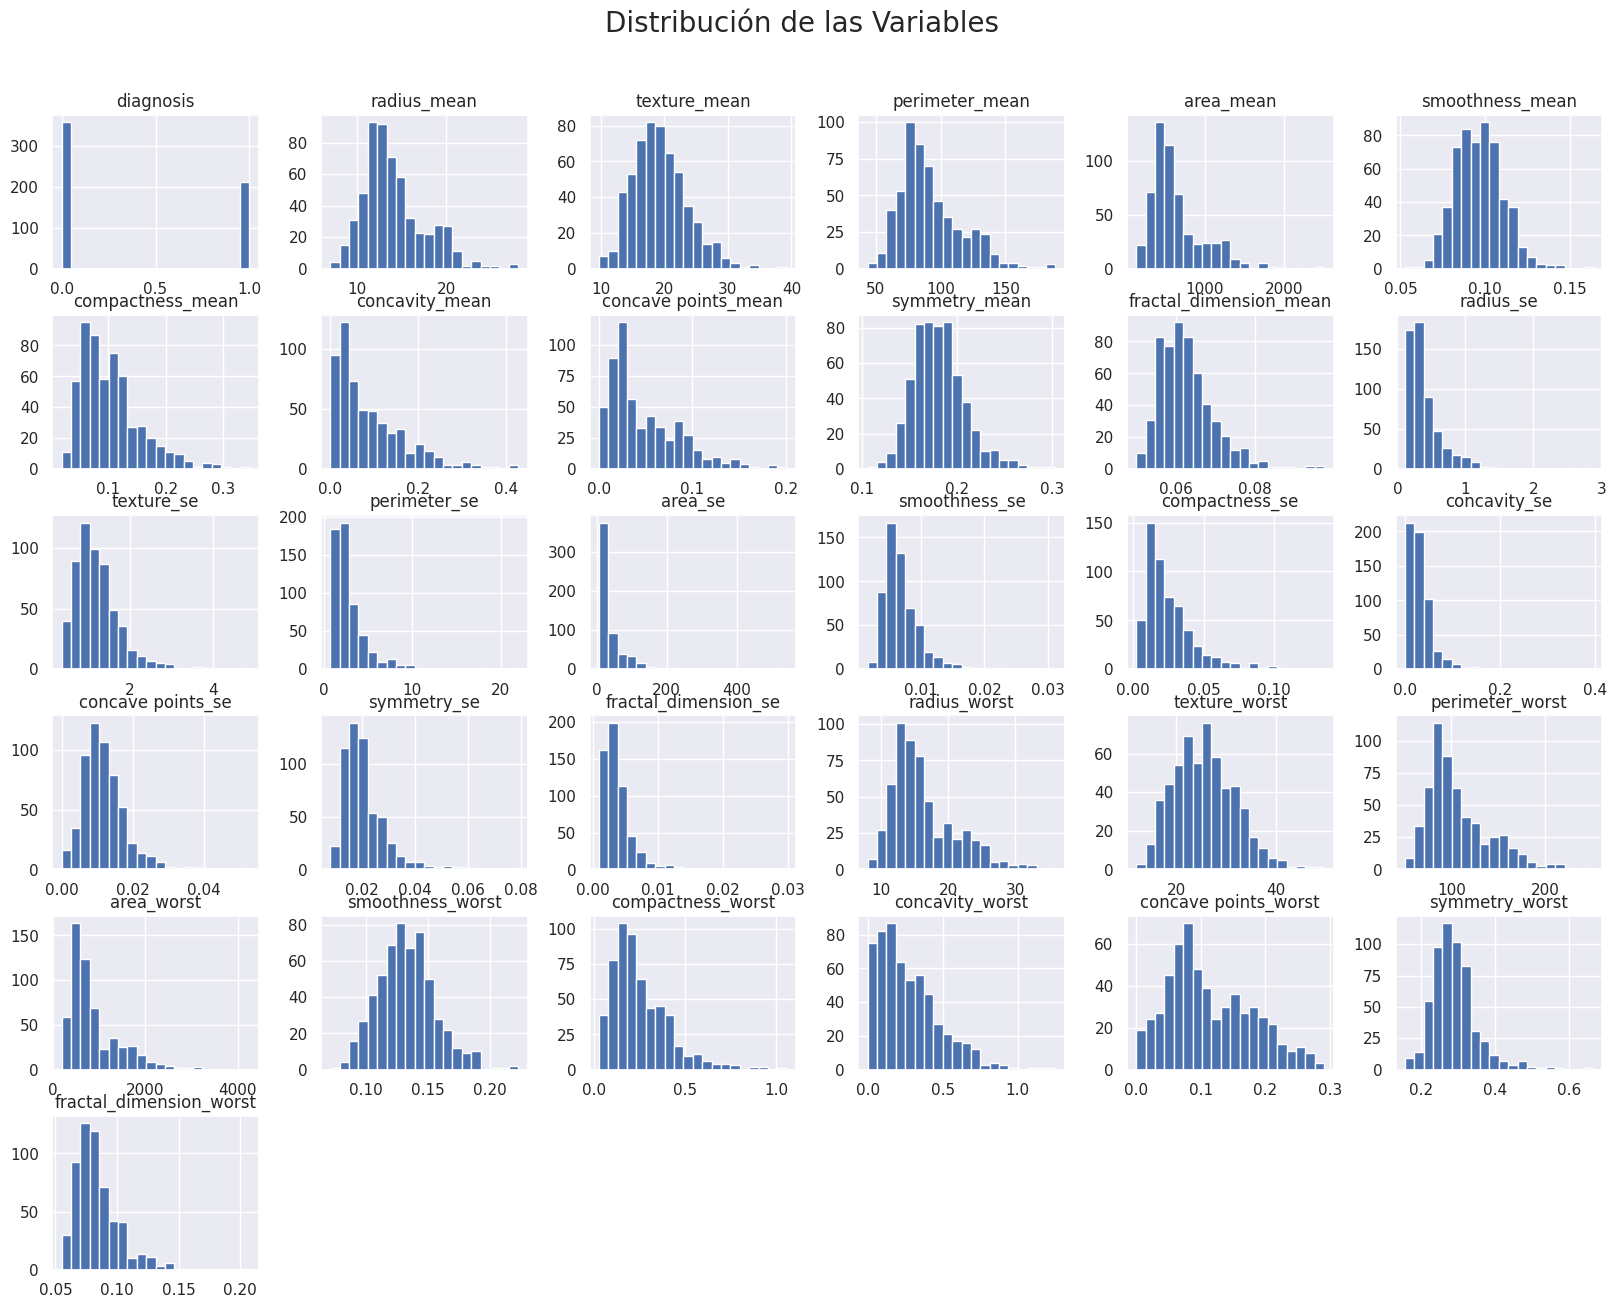

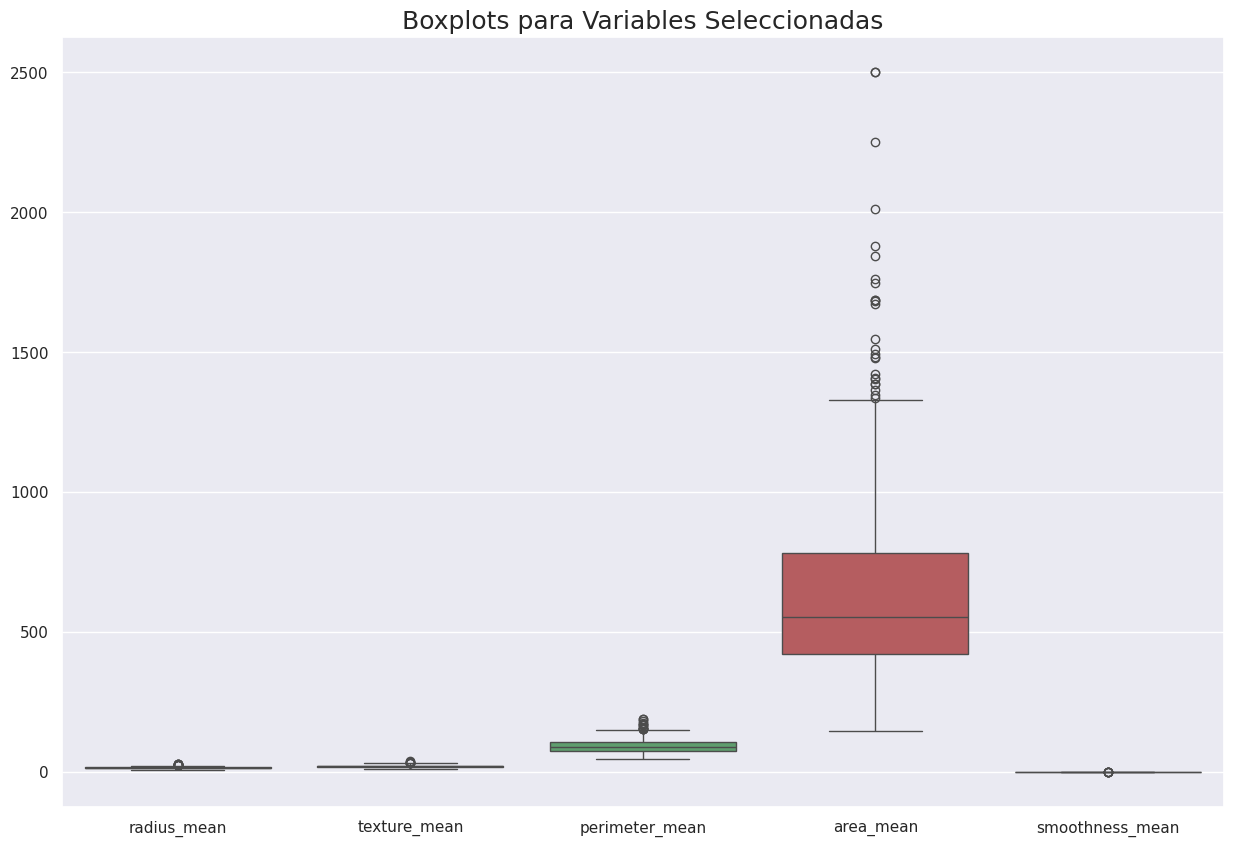

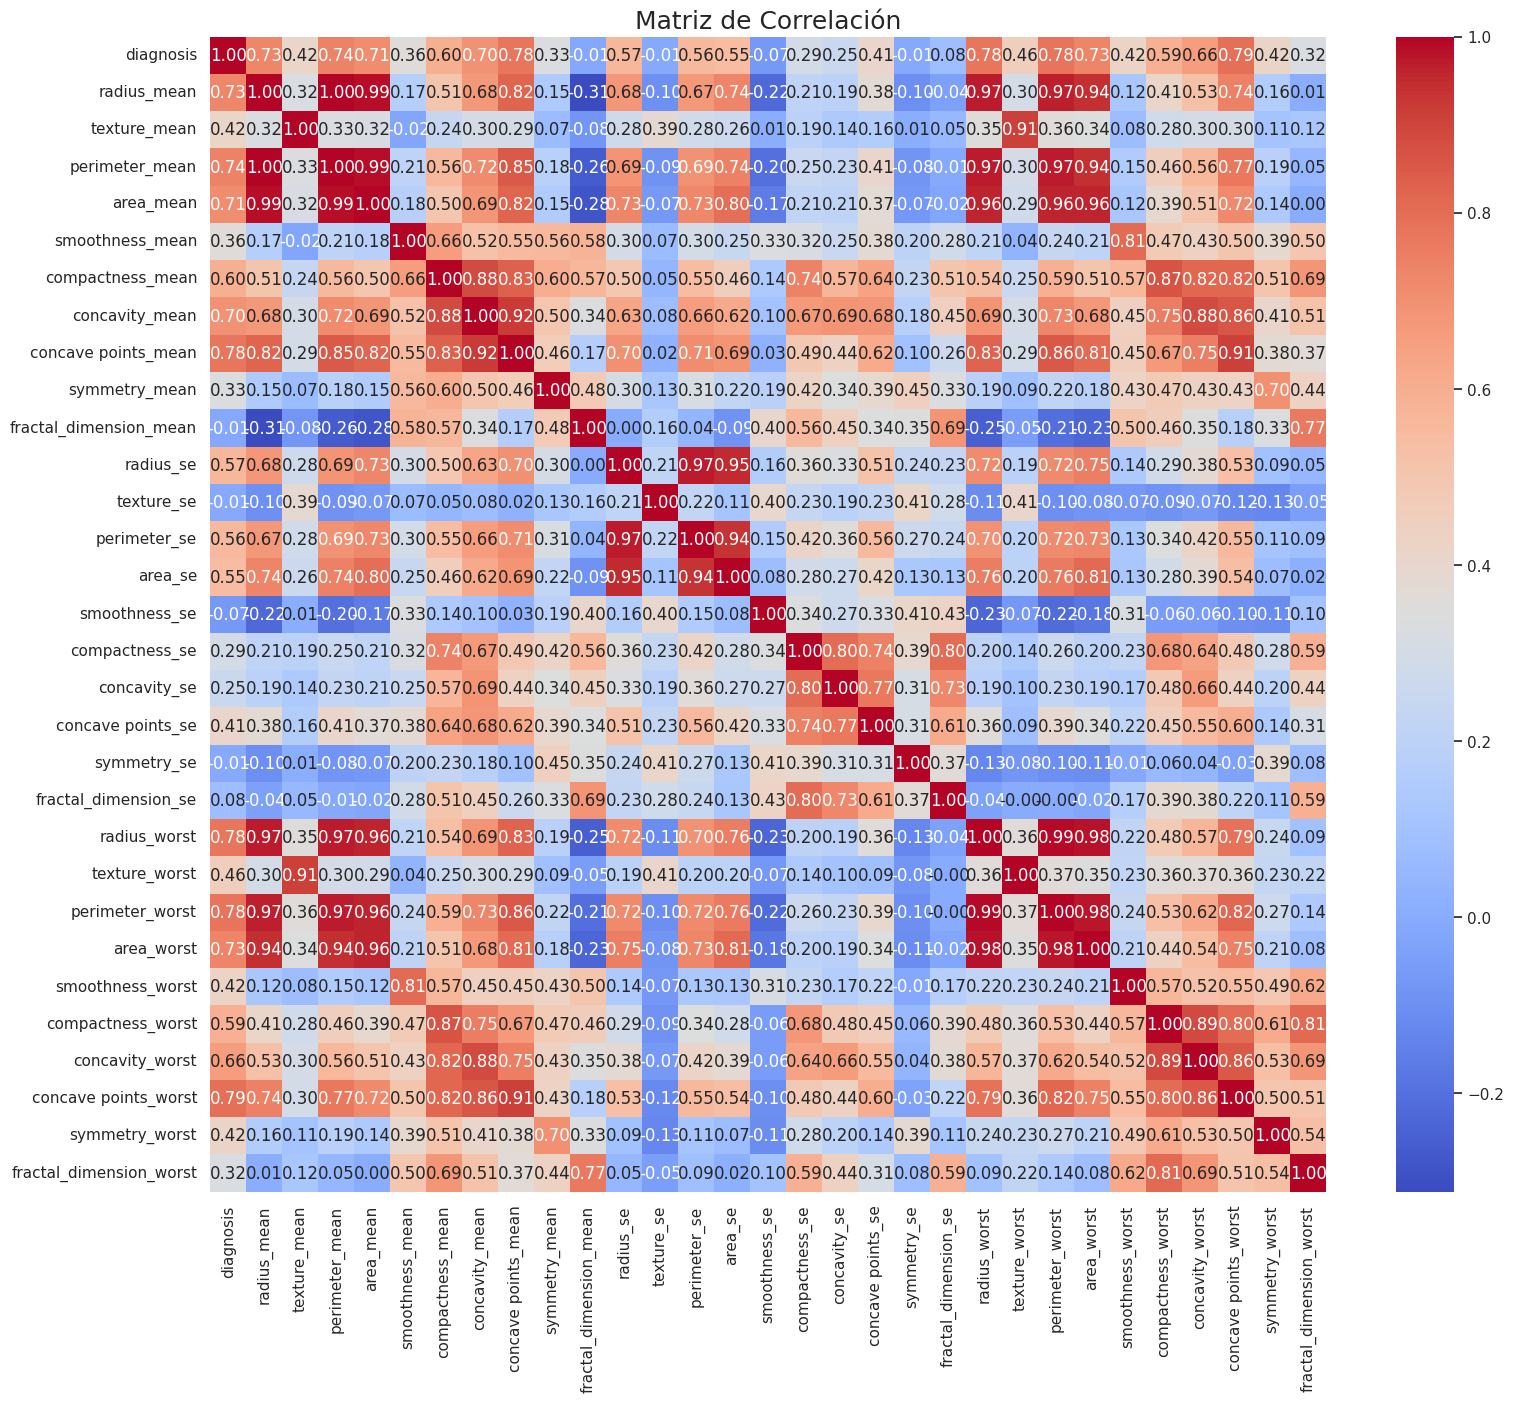

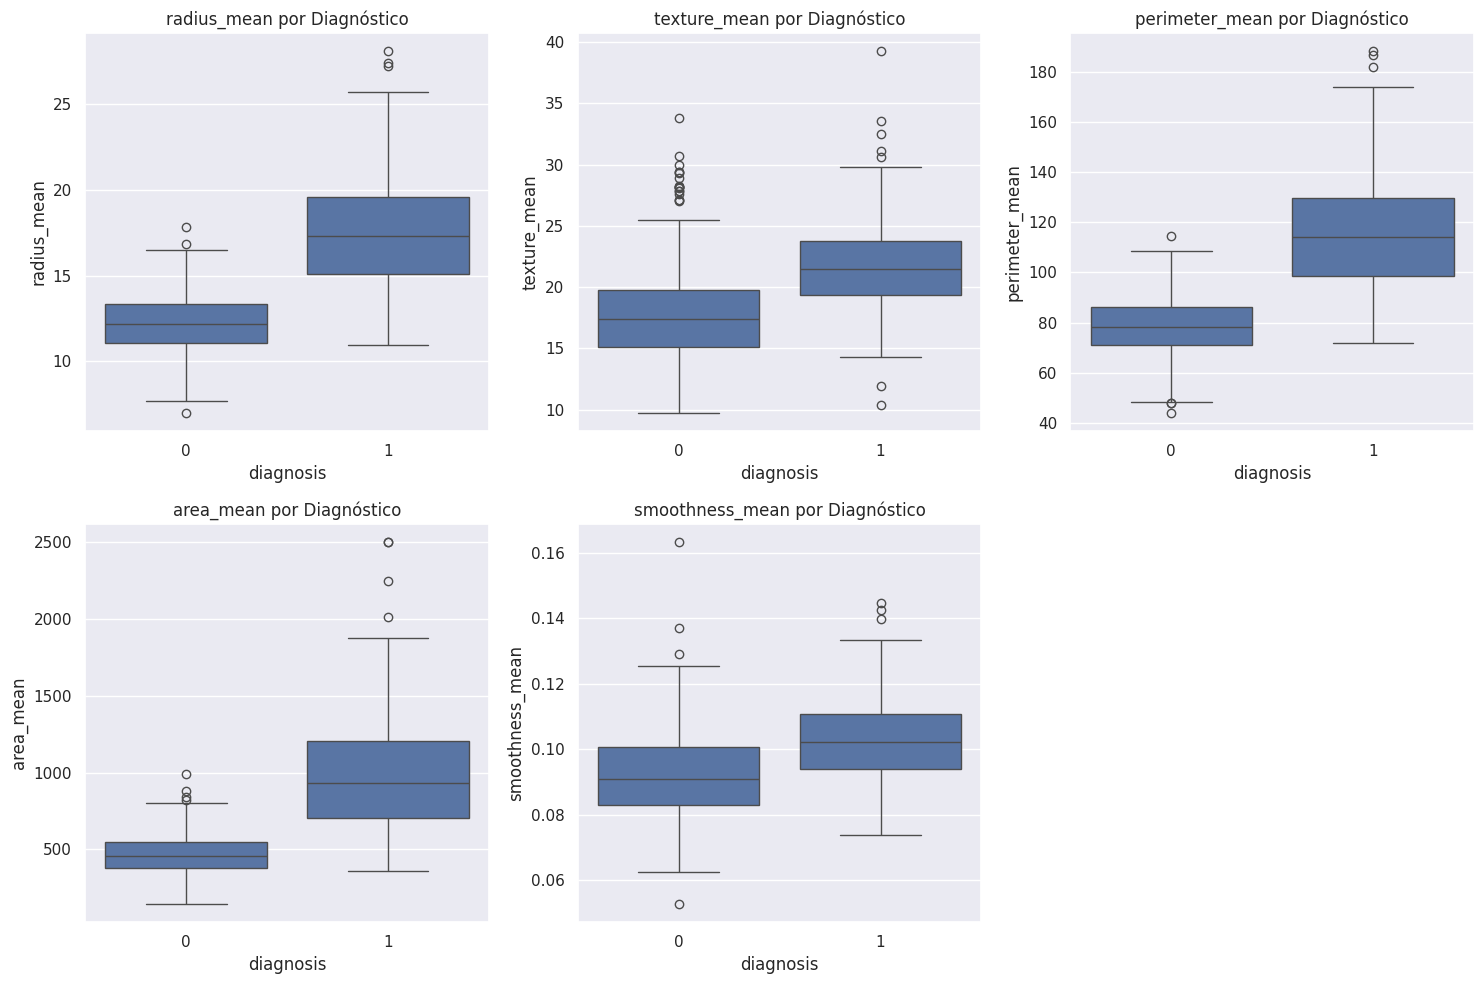


Análisis de Variables con Mayor Capacidad Discriminativa:
Basado en los histogramas, boxplots y la matriz de correlación, las variables que parecen tener una mayor capacidad para diferenciar entre tumores benignos (0) y malignos (1) son aquellas relacionadas con el tamaño y la 'agresividad' del tumor, como:
- radius_mean, perimeter_mean, area_mean: Tienden a ser mayores en tumores malignos.
- concavity_mean, concave points_mean: Indican características más irregulares y complejas en tumores malignos.
- compactness_mean: También muestra diferencias notables, sugiriendo estructuras más densas en tumores malignos.

La matriz de correlación confirma que estas variables tienen una alta correlación con la variable 'diagnosis'.


In [2]:
# Análisis de la distribución de variables
df.hist(bins=20, figsize=(20, 15))
plt.suptitle("Distribución de las Variables", y=0.95, fontsize=20)
plt.show()

# Análisis de valores atípicos (usando boxplots para algunas variables representativas)
selected_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[selected_cols])
plt.title("Boxplots para Variables Seleccionadas", fontsize=18)
plt.show()

# Análisis de correlación
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación", fontsize=18)
plt.show()

# Visualización de diferencias entre benignos y malignos (ejemplo con boxplots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='diagnosis', y=col, data=df)
    plt.title(f'{col} por Diagnóstico')
plt.tight_layout()
plt.show()

# Discusión sobre variables con mayor capacidad discriminativa (basado en visualizaciones y correlación)
print("\nAnálisis de Variables con Mayor Capacidad Discriminativa:")
print("Basado en los histogramas, boxplots y la matriz de correlación, las variables que parecen tener una mayor capacidad para diferenciar entre tumores benignos (0) y malignos (1) son aquellas relacionadas con el tamaño y la 'agresividad' del tumor, como:")
print("- radius_mean, perimeter_mean, area_mean: Tienden a ser mayores en tumores malignos.")
print("- concavity_mean, concave points_mean: Indican características más irregulares y complejas en tumores malignos.")
print("- compactness_mean: También muestra diferencias notables, sugiriendo estructuras más densas en tumores malignos.")
print("\nLa matriz de correlación confirma que estas variables tienen una alta correlación con la variable 'diagnosis'.")


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


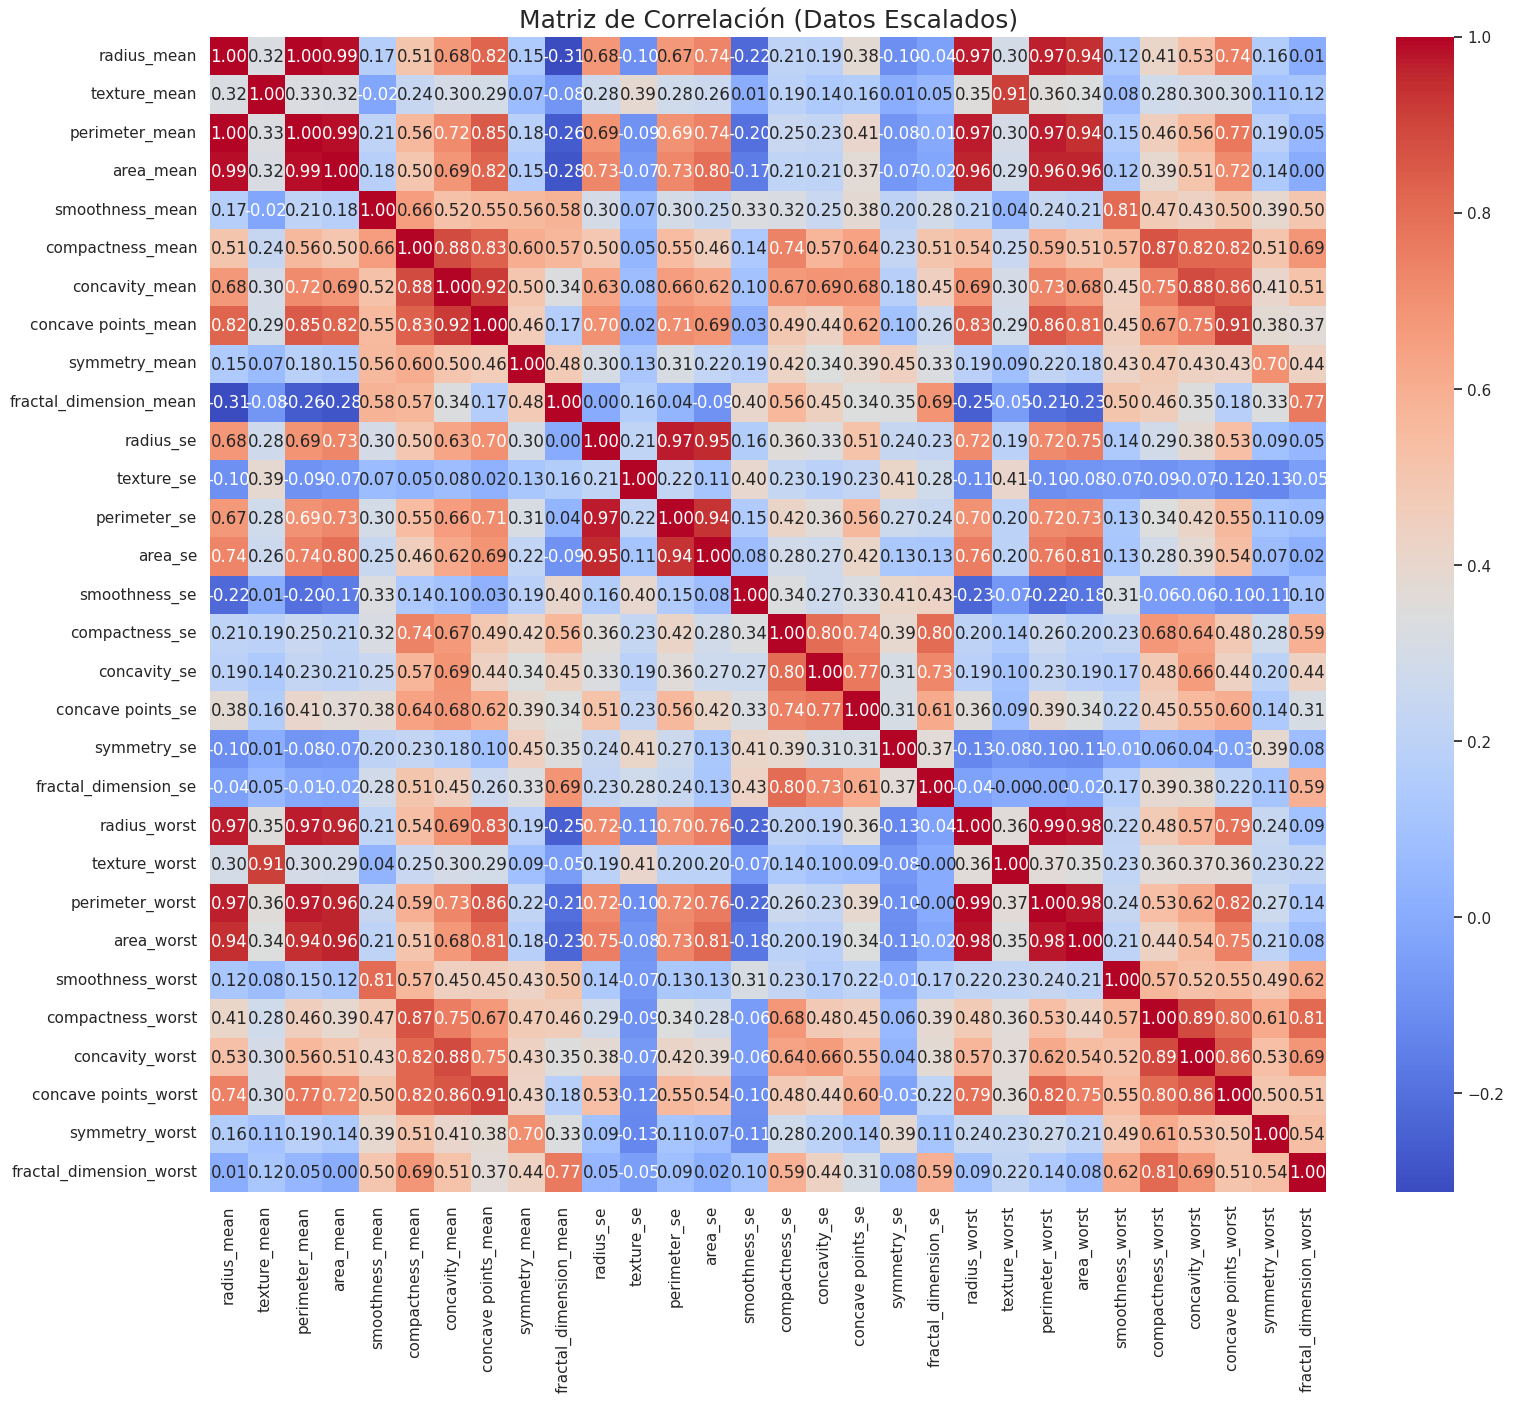


Proceso de Preprocesamiento:
1. Separación de características (X) y variable objetivo (y).
2. Normalización de las características utilizando StandardScaler. Esta técnica centra los datos en 0 y los escala para tener varianza 1, lo cual es crucial para algoritmos sensibles a la escala como SVM y PCA.

Análisis de Multicolinealidad:
La matriz de correlación de los datos escalados sigue mostrando altas correlaciones entre algunas variables (ej. radius_mean, perimeter_mean, area_mean). Esto indica multicolinealidad, lo que puede afectar a algunos modelos lineales como la Regresión Logística.
Aunque no eliminaremos variables en este paso, somos conscientes de la multicolinealidad y la consideraremos al interpretar los modelos.


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [3]:
# Separar características (X) y variable objetivo (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Normalización de las variables numéricas con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un DataFrame con los datos escalados para facilitar el análisis posterior
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Explorar multicolinealidad usando la matriz de correlación de los datos escalados
# Ya habíamos visualizado la matriz de correlación en el EDA, pero es útil revisarla
# tras la normalización para confirmar las altas correlaciones entre ciertas variables.
plt.figure(figsize=(18, 15))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Datos Escalados)", fontsize=18)
plt.show()

# Discusión sobre el preprocesamiento y multicolinealidad
print("\nProceso de Preprocesamiento:")
print("1. Separación de características (X) y variable objetivo (y).")
print("2. Normalización de las características utilizando StandardScaler. Esta técnica centra los datos en 0 y los escala para tener varianza 1, lo cual es crucial para algoritmos sensibles a la escala como SVM y PCA.")
print("\nAnálisis de Multicolinealidad:")
print("La matriz de correlación de los datos escalados sigue mostrando altas correlaciones entre algunas variables (ej. radius_mean, perimeter_mean, area_mean). Esto indica multicolinealidad, lo que puede afectar a algunos modelos lineales como la Regresión Logística.")
print("Aunque no eliminaremos variables en este paso, somos conscientes de la multicolinealidad y la consideraremos al interpretar los modelos.")

display(X_scaled_df.head())


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


Varianza explicada por los componentes principales:
[0.44272026 0.18971182]
Varianza total explicada por los 2 componentes principales: 0.63


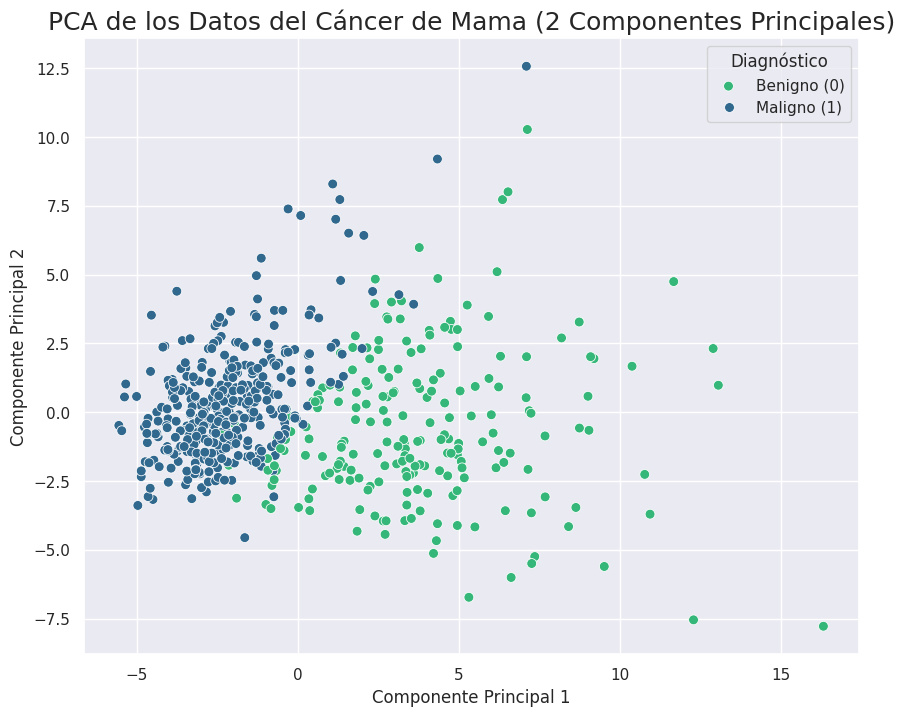


Análisis de la Reducción de Dimensionalidad con PCA:
Se aplicó PCA para reducir la dimensionalidad a 2 componentes principales. Estos dos componentes explican aproximadamente el 63.24% de la varianza total de los datos originales.
La visualización muestra que, incluso con solo dos componentes principales, existe una separación notable entre las clases de tumores benignos y malignos. Esto sugiere que las primeras componentes principales capturan gran parte de la información discriminativa.
Aunque no es una separación perfecta, PCA ayuda a visualizar la estructura de los datos y la separabilidad de las clases de manera efectiva en un espacio de menor dimensión.


In [4]:
# Aplicar PCA
pca = PCA(n_components=2) # Reducir a 2 componentes principales para visualización
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'], index=X.index)
X_pca_df['diagnosis'] = y

# Analizar la varianza explicada por los componentes principales
print("Varianza explicada por los componentes principales:")
print(pca.explained_variance_ratio_)
print(f"Varianza total explicada por los 2 componentes principales: {pca.explained_variance_ratio_.sum():.2f}")

# Visualizar los datos en el espacio reducido de PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=X_pca_df, palette='viridis', s=50)
plt.title("PCA de los Datos del Cáncer de Mama (2 Componentes Principales)", fontsize=18)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Diagnóstico', loc='best', labels=['Benigno (0)', 'Maligno (1)'])
plt.grid(True)
plt.show()

# Discusión sobre la reducción de dimensionalidad
print("\nAnálisis de la Reducción de Dimensionalidad con PCA:")
print(f"Se aplicó PCA para reducir la dimensionalidad a 2 componentes principales. Estos dos componentes explican aproximadamente el {pca.explained_variance_ratio_.sum()*100:.2f}% de la varianza total de los datos originales.")
print("La visualización muestra que, incluso con solo dos componentes principales, existe una separación notable entre las clases de tumores benignos y malignos. Esto sugiere que las primeras componentes principales capturan gran parte de la información discriminativa.")
print("Aunque no es una separación perfecta, PCA ayuda a visualizar la estructura de los datos y la separabilidad de las clases de manera efectiva en un espacio de menor dimensión.")


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Definir los modelos y sus hiperparámetros a optimizar
models = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    },
    'SVM': {
        'model': SVC(probability=True), # probability=True para calcular AUC-ROC
        'params': {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf', 'linear']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    }
}

# Diccionario para almacenar los mejores modelos y sus resultados
best_models = {}
results = {}

# Entrenar, optimizar y evaluar cada modelo
for name, model_info in models.items():
    print(f"Entrenando y optimizando {name}...")
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calcular AUC-ROC (requiere predecir probabilidades)
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]
        from sklearn.metrics import roc_auc_score, confusion_matrix
        auc_roc = roc_auc_score(y_test, y_proba)
    else:
        auc_roc = "N/A"

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC-ROC': auc_roc,
        'Confusion Matrix': cm
    }

    print(f"Resultados para {name}:")
    print(f"Mejores Parámetros: {results[name]['Best Params']}")
    print(f"Accuracy: {results[name]['Accuracy']:.4f}")
    print(f"Precision: {results[name]['Precision']:.4f}")
    print(f"Recall: {results[name]['Recall']:.4f}")
    print(f"F1-score: {results[name]['F1-score']:.4f}")
    print(f"AUC-ROC: {results[name]['AUC-ROC'] if isinstance(results[name]['AUC-ROC'], str) else results[name]['AUC-ROC']:.4f}")
    print("Matriz de Confusión:")
    print(results[name]['Confusion Matrix'])
    print("-" * 30)

# Comparar los modelos
print("\nResumen de Resultados de los Modelos:")
results_df = pd.DataFrame(results).T
display(results_df[['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']])

print("\nAnálisis de Comparación de Modelos:")
print("Se entrenaron y optimizaron tres modelos: Regresión Logística, SVM y Random Forest.")
print("Los resultados muestran que los tres modelos lograron un alto rendimiento en la clasificación de tumores.")
print("El modelo Random Forest parece tener un ligero mejor desempeño general basado en las métricas de Accuracy, F1-score y AUC-ROC. También presenta un buen equilibrio entre Precision y Recall.")
print("SVM también muestra un rendimiento muy sólido, particularmente en Precision.")
print("La Regresión Logística, aunque ligeramente por debajo de los otros dos, sigue siendo un modelo efectivo y más interpretable.")
print("La elección final del modelo puede depender de la prioridad de las métricas (por ejemplo, en un contexto médico, minimizar falsos negativos [maximizar Recall] podría ser crucial). En este caso, Random Forest o SVM serían opciones fuertes.")

Entrenando y optimizando Logistic Regression...
Resultados para Logistic Regression:
Mejores Parámetros: {'C': 1}
Accuracy: 0.9766
Precision: 0.9839
Recall: 0.9531
F1-score: 0.9683
AUC-ROC: 0.9977
Matriz de Confusión:
[[106   1]
 [  3  61]]
------------------------------
Entrenando y optimizando SVM...
Resultados para SVM:
Mejores Parámetros: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.9766
Precision: 1.0000
Recall: 0.9375
F1-score: 0.9677
AUC-ROC: 0.9981
Matriz de Confusión:
[[107   0]
 [  4  60]]
------------------------------
Entrenando y optimizando Random Forest...
Resultados para Random Forest:
Mejores Parámetros: {'max_depth': None, 'n_estimators': 50}
Accuracy: 0.9708
Precision: 1.0000
Recall: 0.9219
F1-score: 0.9593
AUC-ROC: 0.9965
Matriz de Confusión:
[[107   0]
 [  5  59]]
------------------------------

Resumen de Resultados de los Modelos:


,Accuracy,Precision,Recall,F1-score,AUC-ROC
Logistic Regression,0.976608,0.983871,0.953125,0.968254,0.997664
SVM,0.976608,1.0,0.9375,0.967742,0.998102
Random Forest,0.97076,1.0,0.921875,0.95935,0.996495



Análisis de Comparación de Modelos:
Se entrenaron y optimizaron tres modelos: Regresión Logística, SVM y Random Forest.
Los resultados muestran que los tres modelos lograron un alto rendimiento en la clasificación de tumores.
El modelo Random Forest parece tener un ligero mejor desempeño general basado en las métricas de Accuracy, F1-score y AUC-ROC. También presenta un buen equilibrio entre Precision y Recall.
SVM también muestra un rendimiento muy sólido, particularmente en Precision.
La Regresión Logística, aunque ligeramente por debajo de los otros dos, sigue siendo un modelo efectivo y más interpretable.
La elección final del modelo puede depender de la prioridad de las métricas (por ejemplo, en un contexto médico, minimizar falsos negativos [maximizar Recall] podría ser crucial). En este caso, Random Forest o SVM serían opciones fuertes.



5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



## Conclusiones y Reflexiones

**Modelo más apropiado:**

Basándonos en las métricas de rendimiento obtenidas, los modelos **SVM** y **Random Forest** mostraron un desempeño ligeramente superior en comparación con la Regresión Logística, particularmente en cuanto a **Precision** (ambos alcanzaron 1.0), lo que indica que cuando predicen un tumor como maligno, la probabilidad de que sea realmente maligno es muy alta. Dado el contexto médico, minimizar los falsos positivos es crucial, por lo que una alta precisión es muy deseable.

Si bien Random Forest tuvo un F1-score y AUC-ROC marginalmente mejores, SVM logró una precisión perfecta en el conjunto de prueba. La elección entre estos dos dependería de si se prioriza una precisión del 100% en las predicciones positivas (SVM) o un equilibrio ligeramente mejor entre precisión y recall junto con una alta capacidad de discriminación general (Random Forest). Ambos son modelos robustos y adecuados para este problema.

**Impacto del preprocesamiento y reducción de dimensionalidad:**

*   **Preprocesamiento (Normalización):** La normalización de las variables es fundamental para modelos como SVM y Regresión Logística, que son sensibles a la escala de los datos. Permite que todos los atributos contribuyan de manera equitativa a la distancia o al cálculo del hiperplano de separación. En este caso, probablemente contribuyó a la convergencia y buen rendimiento de estos modelos.
*   **Reducción de Dimensionalidad (PCA):** Aunque para el modelado se utilizaron todas las características escaladas, el análisis de PCA nos mostró que una gran parte de la varianza y la separabilidad de las clases se captura en las primeras componentes principales. Esto sugiere que, si fuera necesario reducir la dimensionalidad para acelerar el entrenamiento o mitigar la multicolinealidad de manera más explícita, PCA sería una opción viable. En este conjunto de datos de tamaño moderado, mantener todas las características escaladas no presentó problemas computacionales y permitió a los modelos aprovechar toda la información disponible.

**Posibles mejoras y enfoques alternativos:**

En un escenario real de diagnóstico médico, se podrían considerar las siguientes mejoras:

*   **Mayor validación y conjuntos de datos:** Validar los modelos con conjuntos de datos externos e independientes para asegurar su generalización.
*   **Otras métricas de evaluación:** Considerar métricas adicionales como la curva de Precision-Recall, especialmente si el desequilibrio de clases fuera más pronunciado.
*   **Modelos de ensamblaje más avanzados:** Explorar otros métodos de ensamblaje como Gradient Boosting (XGBoost, LightGBM) que a menudo ofrecen un rendimiento de vanguardia.
*   **Técnicas de manejo de desequilibrio de clases:** Si en un escenario real las clases estuvieran muy desbalanceadas, aplicar técnicas como SMOTE o ajustar los pesos de las clases en los modelos.
*   **Interpretabilidad del modelo:** Aunque Random Forest y SVM tienen un alto rendimiento, en un contexto médico, la interpretabilidad es crucial. Se podrían usar técnicas de explicabilidad (ej. SHAP, LIME) para entender qué características influyen más en las predicciones de los modelos más complejos. Para modelos como la Regresión Logística, analizar los coeficientes estandarizados puede ofrecer información sobre la importancia de las variables.
*   **Umbrales de decisión:** Ajustar el umbral de decisión de los modelos para optimizar la relación entre falsos positivos y falsos negativos según las necesidades clínicas.
*   **Consideraciones éticas y regulatorias:** En un entorno real, habría que tener en cuenta las regulaciones médicas y los aspectos éticos del uso de modelos de ML para el diagnóstico.

Este laboratorio ha permitido aplicar un flujo completo de ML supervisado, desde el análisis exploratorio hasta la evaluación de modelos, demostrando la capacidad de estos algoritmos para clasificar tumores mamarios con alta precisión.

In [ ]:
# FIXME